In [10]:
from astropy.io import fits
hdulist = fits.open('218wmos.fits')
hdulist.info()

Filename: 218wmos.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     247   (1600, 1600)   float32   
  1  pippomos_cvt.tab    1 TableHDU       353   1R x 49C   [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I12, I12, I12, I12, I12, I12, I12, I12, A48, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7]   


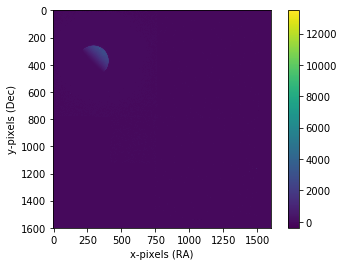

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
data = hdulist[0].data


# Plot the 2D array
plt.imshow(data)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()

In [12]:
import numpy as np
brightpoint = np.unravel_index(np.argmax(data, axis=None),data.shape)
print(brightpoint)

(567, 1510)


In [ ]:
def median_fits(filenames):

  start = time.time()   # Start timer
  # Read in all the FITS files and store in list
  FITS_list = []
  for filename in filenames: 
    hdulist = fits.open(filename)
    FITS_list.append(hdulist[0].data)
    hdulist.close()

  # Stack image arrays in 3D array for median calculation
  FITS_stack = np.dstack(FITS_list)

  median = np.median(FITS_stack, axis=2)

  # Calculate the memory consumed by the data
  memory = FITS_stack.nbytes
  # or, equivalently:
  #memory = 200 * 200 * len(filenames) * FITS_stack.itemsize

  # convert to kB:
  memory /= 1024
  
  stop = time.time() - start   # stop timer
  return median, stop, memory